In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2, os

from sklearn.cluster import KMeans
import easyocr

In [2]:
!which python

/home/suetin/Projects/VSCode/ExciseProject/.venv/bin/python


In [3]:
# %cd drive/MyDrive/ColabNotebooks/ExciseOCR/
%cd ..

/home/suetin/Projects/VSCode/ExciseProject/ExciseOCR


/home/suetin/Projects/VSCode/ExciseProject/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
reader = easyocr.Reader(['ru']) # this needs to run only once to load the model into memory
# result = reader.readtext('data/splits/mark_0-0.jpg')  # /content/drive/MyDrive/ColabNotebooks/ExciseOCR/data/splits/mark_0-0.jpg
# result

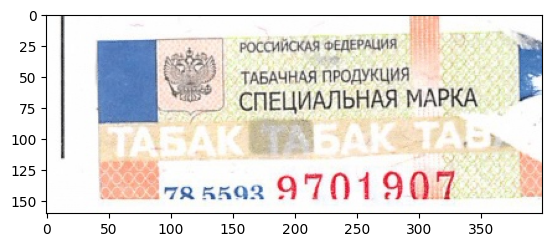

In [5]:
img = cv2.imread('data/splits/mark_0-0.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE));


In [6]:
series_mask = cv2.inRange(np.float32(hsv),
    lowerb=np.array([105, 50, 0]),
    upperb=np.array([115, 360, 360])
)
number_mask = cv2.inRange(np.float32(hsv),
    lowerb=np.array([170, 50, 0]),
    upperb=np.array([180, 360, 360])
)
number_mask[:5, :5], series_mask[:5, :5]

(array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=uint8))

In [7]:
number_mask.shape, series_mask.shape

((400, 160), (400, 160))

##  Version 2

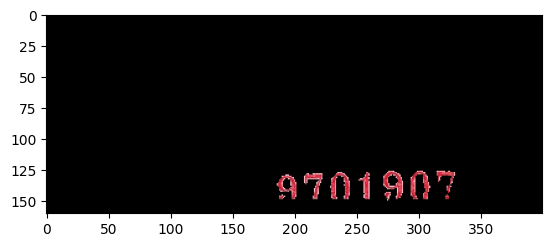

In [8]:
output = cv2.bitwise_and(hsv, hsv, mask=number_mask)
output = cv2.cvtColor(output, cv2.COLOR_HSV2RGB)
output = cv2.rotate(output, cv2.ROTATE_90_COUNTERCLOCKWISE)

plt.imshow(output);

In [9]:
reader.readtext(output)

[([[np.int32(181), np.int32(121)],
   [np.int32(337), np.int32(121)],
   [np.int32(337), np.int32(157)],
   [np.int32(181), np.int32(157)]],
  '9711 97',
  np.float64(0.5951772536411654))]

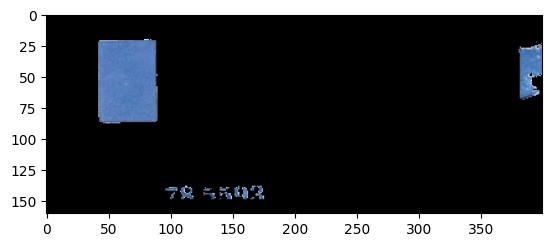

In [10]:
output = cv2.bitwise_and(hsv, hsv, mask=series_mask)
output = cv2.cvtColor(output, cv2.COLOR_HSV2RGB)
output = cv2.rotate(output, cv2.ROTATE_90_COUNTERCLOCKWISE)

plt.imshow(output);

In [11]:
reader.readtext(output)

[([[np.int32(95), np.int32(134)],
   [np.int32(179), np.int32(134)],
   [np.int32(179), np.int32(154)],
   [np.int32(95), np.int32(154)]],
  '7а =4ш',
  np.float64(0.4227960108184462))]

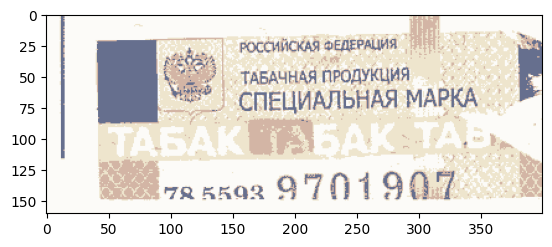

In [12]:
from sklearn.cluster import KMeans


n_classes = 4
model = KMeans(n_clusters=n_classes)

model.fit(img.reshape(-1, 3))

new_img = img.copy().reshape((-1, 3))

for i in range(n_classes):
    indxs = np.where(model.labels_ == i)
    new_img[indxs] = model.cluster_centers_[i]

new_img = new_img.reshape(img.shape)
new_img = cv2.rotate(new_img, cv2.ROTATE_90_COUNTERCLOCKWISE)

plt.imshow(new_img)

In [13]:
%%time
# Get result of predictions
res = reader.readtext(new_img)
res[5:]

CPU times: user 105 ms, sys: 8.09 ms, total: 113 ms
Wall time: 115 ms


[([[np.int32(175), np.int32(81)],
   [np.int32(365), np.int32(81)],
   [np.int32(365), np.int32(121)],
   [np.int32(175), np.int32(121)]],
  'ПАХ : #',
  np.float64(0.19646069632920815)),
 ([[np.int32(93), np.int32(133)],
   [np.int32(179), np.int32(133)],
   [np.int32(179), np.int32(153)],
   [np.int32(93), np.int32(153)]],
  '78 559?',
  np.float64(0.3931859360948493)),
 ([[np.int32(179), np.int32(120)],
   [np.int32(335), np.int32(120)],
   [np.int32(335), np.int32(159)],
   [np.int32(179), np.int32(159)]],
  '9701907',
  np.float64(0.9996100532423243))]

## Detect Rectangle 

https://stackoverflow.com/questions/61166180/detect-rectangles-in-opencv-4-2-0-using-python-3-7

In [14]:
# import cv2

# width=700
# height=700
# y1=0
# y2=700
# x1=500
# x2=700
# img=cv2.imread('test.jpg') #read image
# img=cv2.resize(img,(width,height)) #resize image
# roi = img[y1:y2, x1:x2] #region of interest i.e where the rectangles will be
# gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY) #convert roi into gray
# Blur=cv2.GaussianBlur(gray,(5,5),1) #apply blur to roi
# Canny=cv2.Canny(Blur,10,50) #apply canny to roi

# #Find my contours
# contours =cv2.findContours(Canny,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)[0]

# #Loop through my contours to find rectangles and put them in a list, so i can view them individually later.
# cntrRect = []
# for i in contours:
#         epsilon = 0.05*cv2.arcLength(i,True)
#         approx = cv2.approxPolyDP(i,epsilon,True)
#         if len(approx) == 4:
#             cv2.drawContours(roi,cntrRect,-1,(0,255,0),2)
#             cv2.imshow('Roi Rect ONLY',roi)
#             cntrRect.append(approx)



# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Load data

1. Load full image                    # First circle
2. Split into peaces 5x10             # Second circle
3. Prepare the image for model        # For every image, where image is a small pieces (1 excise)
- 3.1. Crop upper part of image         # Use hsv color mask and then use argmax
- 3.2. MAY BE reshape image to more size # SOMNIIIITELNOO
4. Apply model                        # Get model predict 
5. Postrocces text output             # We also have a text here*
6. Get: probability and results of detection


*try remove it. First idea is get in 3.1 Remove text from image. Delete it in the future


In [15]:
def load_image(path:str):
    assert type(path) == str
    assert os.path.exists(path)

    img = cv2.imread(path)
    assert img is not None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

(400, 160, 3)


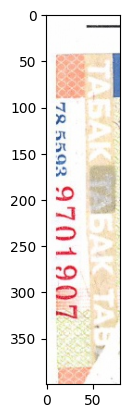

In [16]:
print(img.shape)
plt.imshow(img[:, 0:80])

In [17]:
from src.scripts.utils import segmenting_image, prepare_image

In [18]:
X = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
X = X[80:, :, :]
x = X.reshape((-1, 3))

# Init and fit model
n_classes = 3
model = KMeans(n_clusters=n_classes)
model.fit(x)


KMeans(n_clusters=3)

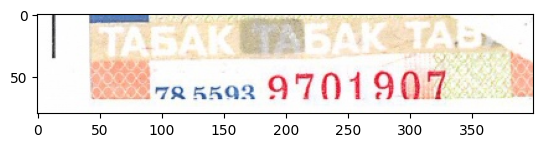

In [19]:
plt.imshow(X)

In [20]:
import re

def postpocess(result):
    """ Choose only numbers, filter text 
    # result contain [num_detections][positions(0), value(1), probabiliti(2)][values]
    """
    values = []
    bboxs = []
    probabilities = []

    for res in result:
        text = res[1]   # text
        # [int(s) for s in txt.split() if s.isdigit()]
        output = re.findall(r'\d+', text)  # r'\b\d+\b'
        if output and len(output[0]) > 1:
            print(f"{output}")
            values.append(output)
            bboxs.append(res[0])
            probabilities.append(res[2])
    
    return bboxs, values, probabilities

bb, v, p = postpocess(res)


['78', '559']
['9701907']


In [21]:
bb, v, p

([[[np.int32(93), np.int32(133)],
   [np.int32(179), np.int32(133)],
   [np.int32(179), np.int32(153)],
   [np.int32(93), np.int32(153)]],
  [[np.int32(179), np.int32(120)],
   [np.int32(335), np.int32(120)],
   [np.int32(335), np.int32(159)],
   [np.int32(179), np.int32(159)]]],
 [['78', '559'], ['9701907']],
 [np.float64(0.3931859360948493), np.float64(0.9996100532423243)])

## TODO: 

1. Imporove splitting.
2. Add else .pdf's


data/digits3_0.png
(2339, 1654, 3)
(420, 175, 3)
(175, 420, 3)
['9701907']
results/digits3_0/prod_1.0.jpg
(420, 180, 3)
(180, 420, 3)
['78', '5593']
['9720803']
results/digits3_0/prod_1.0.jpg
(420, 180, 3)
(180, 420, 3)
['78', '5593']
['9701904']
results/digits3_0/prod_1.0.jpg
(420, 180, 3)
(180, 420, 3)
['78', '5593']
['9766999']
results/digits3_0/prod_1.0.jpg
(420, 180, 3)
(180, 420, 3)
['78', '5593']
['9782003']
results/digits3_0/prod_1.0.jpg
(420, 180, 3)
(180, 420, 3)
['78', '5593']
['9731998']
results/digits3_0/prod_1.0.jpg
(420, 180, 3)
(180, 420, 3)
['78', '5565', '0', '049874']
results/digits3_0/prod_0.706.jpg
(420, 180, 3)
(180, 420, 3)
['78', '5593']
['9716501']
results/digits3_0/prod_1.0.jpg
(420, 180, 3)
(180, 420, 3)
['78', '5593']
['9718026']
results/digits3_0/prod_1.0.jpg
(420, 180, 3)
(180, 420, 3)
['78', '5593', '9770998']
results/digits3_0/prod_0.705.jpg
(420, 175, 3)
(175, 420, 3)
['78', '5593']
['9718023']
results/digits3_0/prod_0.635.jpg
(420, 180, 3)
(180, 420, 3

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - Can't parse 'dsize'. Expected sequence length 2, got 3
>  - Can't parse 'dsize'. Expected sequence length 2, got 3


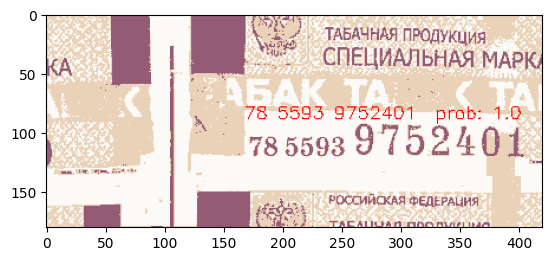

In [23]:
nRows = 5  # 5
mCols = 10  # 10 # Number of columns
# data/digits3_0.png
top_margin = 150
left_margin = 5
mark_width = 160
mark_height = 400
shift = 10
#
data_paths = ['data/digits3_0.png', 'data/digits400.jpg', 'data/digits600.jpg']   #, 'aaaa']

for data_path in data_paths:
    print(data_path)
    # 1. Load full image
    full_image = load_image(data_path)
    print(full_image.shape)
    if full_image.shape[:2] != (2339, 1654):
        full_image = cv2.resize(full_image, (2339, 1654, 3), interpolation=cv2.INTER_CUBIC)
    # 2. Split to 5x10
    for i in range(0, nRows):
        for j in range(0, mCols):

            """ Calculating ROI size """
            # w, h, c = full_image.shape
            # # Diff conturs
            # h = h - top_margin
            # print(h)

            # Save outputs for every image in 
            bboxs, values, probs = [], [], []

            h1 = max(int(i*mark_height) + top_margin - shift, 0)
            
            h2 = int(i*mark_height + mark_height) + top_margin + shift
            if h2 > full_image.shape[0]:
                h2 = full_image.shape[0] - 1
                print("ERROR HERE 2")
            w1 = max(int(j*mark_width) + left_margin - shift, 0)
            w2 = int(j*mark_width + mark_width) + left_margin + shift
            if w2 > full_image.shape[1]:
                w2 = full_image.shape[1] - 1
                print("ERROR HERE 1")
            roi = full_image[h1:h2, w1:w2]
            print(roi.shape)
            # 3. Preparation image before model
            # Rotate to 90 degrees
            roi = cv2.rotate(roi, cv2.ROTATE_90_COUNTERCLOCKWISE)  # (160, 400)
            # KMeans
            seg_img = segmenting_image(model, roi)   # [80:, :, :])

            # display(plt.imshow(seg_img))

            # 4. Get result of predictions
            res = reader.readtext(seg_img)
            # 5. Postrocces text output             # We also have a text here*
            bboxs, numbers, probabilities = postpocess(res)
            # 6. Draw outputs into image
            for bbox, number, prob in zip(bboxs, numbers, probabilities):
                # print(number.join(""))
                roi = cv2.putText(roi, 
                                f"{' '.join(number)}  prob: {round(prob, 3)}".zfill(3), 
                                (bbox[0][0], bbox[0][1]),    # bbox[0][1] + 80   Add 80 due to we crop image in seg_img
                                cv2.FONT_HERSHEY_SIMPLEX, 
                                0.5,   # fornScale
                                (255, 0, 0),   # color
                                1)    # thickness
                plt.imshow(roi)
            # 7. Save image 2339, 1654, 3.')[0]
            file_name = data_path.split("/")[1]
            file_name = file_name.split(".")[0]
            img_name = f"results/{file_name}/prod_{str(round(prob, 3)).zfill(3)}.jpg"
            print(img_name)
            roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

            if os.path.exists(f"results/{file_name}"):
                cv2.imwrite(filename=img_name, img=roi)
            else:
                os.mkdir(f"results/{file_name}")
                cv2.imwrite(filename=img_name, img=roi)

In [ ]:
!ls results

In [ ]:
cv2.imwrite(filename=img_name, img=roi)

False

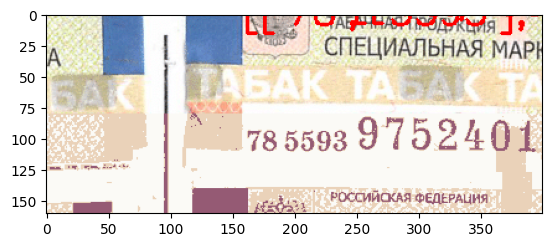

In [ ]:
# res[num_detections][positions(0), value(1), probabiliti(2)][values]
plt.imshow(roi)

78 5593 0.9999161263144857
9752401 0.9987214292244988
РОСЕИЙСКАЯ ФЕДЕРАЦНЯ 0.7733025851748897


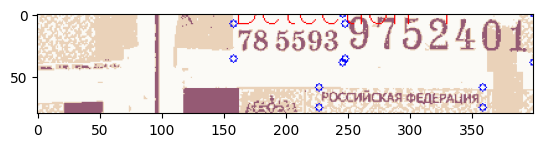

In [ ]:
new_img = seg_img.copy()

for i in range(len(res)):
    coords, vals, prob = res[i]
    for x, y in coords:
        new_img = cv2.circle(new_img, (x, y), radius=3, color=(0, 0, 255), thickness=1)
    print(vals, prob)
cv2.putText(new_img, text="Detection 1", org=(res[0][0][0]), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=1)
cv2.putText(new_img, text="Detection 2", org=(res[1][0][0]), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=1)

plt.imshow(new_img);

In [ ]:
res[i][2]

np.float64(0.7733025851748897)

[  0  15  24 120 167]


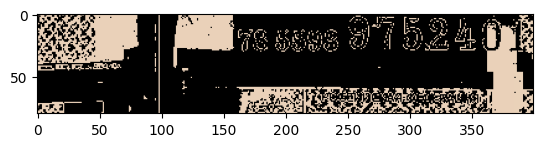

In [ ]:
new_hsv = cv2.cvtColor(new_img, cv2.COLOR_RGB2HSV)

print(np.unique(new_hsv[:, :, 0]))

mask = cv2.inRange(np.float32(new_hsv),
    lowerb=np.array([15, 10, 0]),
    upperb=np.array([24, 360, 360])
)

output = cv2.bitwise_and(new_hsv, new_hsv, mask=mask)
output = cv2.cvtColor(output, cv2.COLOR_HSV2RGB)

plt.imshow(output)

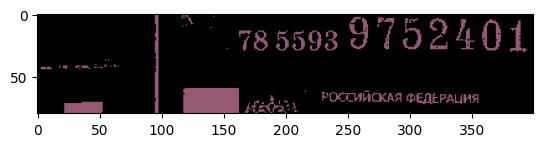

In [ ]:
mask = cv2.inRange(np.float32(new_hsv),
    lowerb=np.array([121, 10, 0]),
    upperb=np.array([167, 360, 360])
)

output = cv2.bitwise_and(new_hsv, new_hsv, mask=mask)
output = cv2.cvtColor(output, cv2.COLOR_HSV2RGB)

plt.imshow(output)

In [ ]:
test_res = reader.readtext(output)
test_res, len(test_res)

([([[np.int32(157), 0],
    [400, 0],
    [400, np.int32(37)],
    [np.int32(157), np.int32(37)]],
   '78 5593 9752401',
   np.float64(0.9500070518799866)),
  ([[np.int32(227), np.int32(61)],
    [np.int32(359), np.int32(61)],
    [np.int32(359), np.int32(75)],
    [np.int32(227), np.int32(75)]],
   'РОСЕИЙаАЯ ФЕДЕРАЦНЯ',
   np.float64(0.5787021677001601))],
 2)

In [ ]:
# res[num_detections][positions(0), value(1), probabiliti(2)][values]
values = []

for bb, val, prob in test_res:
    print(val)
    try:
        num = int(val)   # NUM
        values.append(num)
    except:
        try:
            num = None
            out = val.split(" ")  # Series or "series1 series2 num"
            print(out)
            if len(out) == 2:
                series = np.array(out[1], dtype=int)    # SERIES
            elif len(out) == 3:
                num, series = np.array(out[1:], dtype=int)
                print(num, series)
            else:
                print("UNKNOWN")
        except:
            print("ERROR")



78 5593 9752401
['78', '5593', '9752401']
5593 9752401
РОСЕИЙаАЯ ФЕДЕРАЦНЯ
['РОСЕИЙаАЯ', 'ФЕДЕРАЦНЯ']
ERROR


In [ ]:
values

['78 5593', '9752401', 'РОСЕИЙСКАЯ ФЕДЕРАЦНЯ']